***https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-***

## Libraries Importing

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
plt.rcParams["font.size"]=20
import random

## Data Loading

In [3]:
x_real = np.load('dataset/x_real.npz')['data']
y_real = np.load('dataset/y_real.npy')

In [4]:
print(x_real.shape, y_real.shape)

(6000, 90, 90, 1) (6000, 4)


(-0.5, 89.5, 89.5, -0.5)

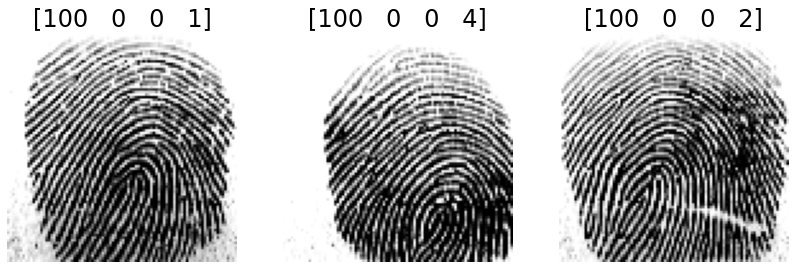

In [5]:
fix,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(14,10))
ax1.set_title(label=y_real[0])
ax1.imshow(x_real[0],cmap="gray")
ax1.axis("off")
ax2.set_title(label=y_real[1])
ax2.imshow(x_real[1],cmap="gray")
ax2.axis("off")
ax3.set_title(label=y_real[2])
ax3.imshow(x_real[2],cmap="gray")
ax3.axis("off")

In [6]:
x_data, x_val, label_data, label_val = train_test_split(x_real, y_real, test_size=0.2)

In [7]:
print(x_data.shape, x_val.shape, label_data.shape, label_val.shape)

(4800, 90, 90, 1) (1200, 90, 90, 1) (4800, 4) (1200, 4)


## Visualization

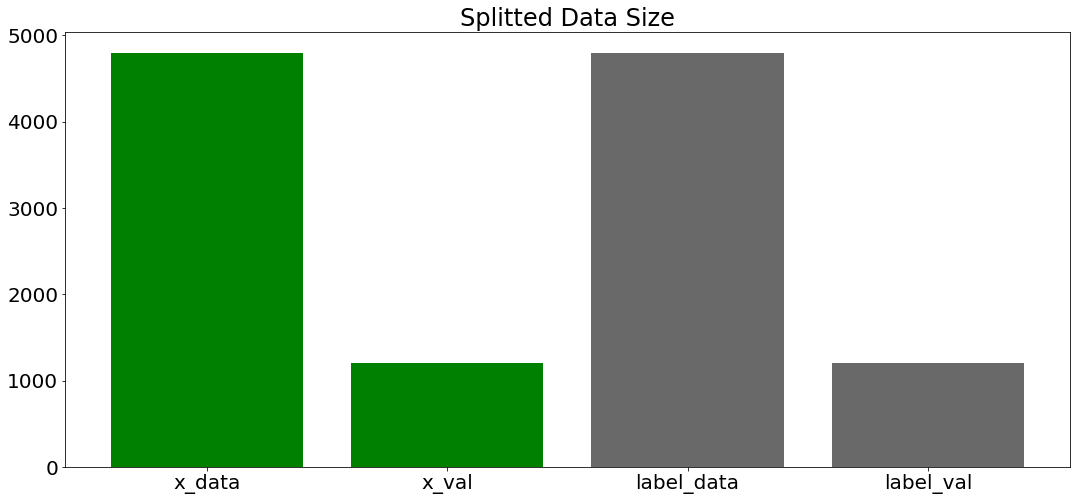

In [8]:
plt.figure(figsize=(18,8))
bar_data=[x_data.shape[0], x_val.shape[0], label_data.shape[0], label_val.shape[0]]
labels=["x_data","x_val","label_data","label_val"]
colors=["green","green","dimgray","dimgray"]
plt.bar(x=labels,height=bar_data,color=colors)
plt.title(label="Splitted Data Size")
plt.show()

In [9]:
label_real_dict = {}

for i, y in enumerate(y_real):
    print(i)
    print(y)
    key = y.astype(str)
    key = ''.join(key).zfill(6)

    label_real_dict[key] = i

0
[100   0   0   1]
1
[100   0   0   4]
2
[100   0   0   2]
3
[100   0   0   3]
4
[100   0   0   0]
5
[100   0   1   1]
6
[100   0   1   4]
7
[100   0   1   2]
8
[100   0   1   3]
9
[100   0   1   0]
10
[101   0   0   1]
11
[101   0   0   4]
12
[101   0   0   2]
13
[101   0   0   3]
14
[101   0   0   0]
15
[101   0   1   1]
16
[101   0   1   4]
17
[101   0   1   2]
18
[101   0   1   3]
19
[101   0   1   0]
20
[102   0   0   1]
21
[102   0   0   4]
22
[102   0   0   2]
23
[102   0   0   3]
24
[102   0   0   0]
25
[102   0   1   1]
26
[102   0   1   4]
27
[102   0   1   2]
28
[102   0   1   3]
29
[102   0   1   0]
30
[103   1   0   1]
31
[103   1   0   4]
32
[103   1   0   2]
33
[103   1   0   3]
34
[103   1   0   0]
35
[103   1   1   1]
36
[103   1   1   4]
37
[103   1   1   2]
38
[103   1   1   3]
39
[103   1   1   0]
40
[104   0   0   1]
41
[104   0   0   4]
42
[104   0   0   2]
43
[104   0   0   3]
44
[104   0   0   0]
45
[104   0   1   1]
46
[104   0   1   4]
47
[104   0   1   2]
48

[170   0   0   1]
771
[170   0   0   4]
772
[170   0   0   2]
773
[170   0   0   3]
774
[170   0   0   0]
775
[170   0   1   1]
776
[170   0   1   4]
777
[170   0   1   2]
778
[170   0   1   3]
779
[170   0   1   0]
780
[171   0   0   1]
781
[171   0   0   4]
782
[171   0   0   2]
783
[171   0   0   3]
784
[171   0   0   0]
785
[171   0   1   1]
786
[171   0   1   4]
787
[171   0   1   2]
788
[171   0   1   3]
789
[171   0   1   0]
790
[172   0   0   1]
791
[172   0   0   4]
792
[172   0   0   2]
793
[172   0   0   3]
794
[172   0   0   0]
795
[172   0   1   1]
796
[172   0   1   4]
797
[172   0   1   2]
798
[172   0   1   3]
799
[172   0   1   0]
800
[173   1   0   1]
801
[173   1   0   4]
802
[173   1   0   2]
803
[173   1   0   3]
804
[173   1   0   0]
805
[173   1   1   1]
806
[173   1   1   4]
807
[173   1   1   2]
808
[173   1   1   3]
809
[173   1   1   0]
810
[174   1   0   1]
811
[174   1   0   4]
812
[174   1   0   2]
813
[174   1   0   3]
814
[174   1   0   0]
815
[174   1  

[244   0   0   0]
1595
[244   0   1   1]
1596
[244   0   1   4]
1597
[244   0   1   2]
1598
[244   0   1   3]
1599
[244   0   1   0]
1600
[245   0   0   1]
1601
[245   0   0   4]
1602
[245   0   0   2]
1603
[245   0   0   3]
1604
[245   0   0   0]
1605
[245   0   1   1]
1606
[245   0   1   4]
1607
[245   0   1   2]
1608
[245   0   1   3]
1609
[245   0   1   0]
1610
[246   0   0   1]
1611
[246   0   0   4]
1612
[246   0   0   2]
1613
[246   0   0   3]
1614
[246   0   0   0]
1615
[246   0   1   1]
1616
[246   0   1   4]
1617
[246   0   1   2]
1618
[246   0   1   3]
1619
[246   0   1   0]
1620
[247   0   0   1]
1621
[247   0   0   4]
1622
[247   0   0   2]
1623
[247   0   0   3]
1624
[247   0   0   0]
1625
[247   0   1   1]
1626
[247   0   1   4]
1627
[247   0   1   2]
1628
[247   0   1   3]
1629
[247   0   1   0]
1630
[248   0   0   1]
1631
[248   0   0   4]
1632
[248   0   0   2]
1633
[248   0   0   3]
1634
[248   0   0   0]
1635
[248   0   1   1]
1636
[248   0   1   4]
1637
[248   0   

[314   0   0   2]
2373
[314   0   0   3]
2374
[314   0   0   0]
2375
[314   0   1   1]
2376
[314   0   1   4]
2377
[314   0   1   2]
2378
[314   0   1   3]
2379
[314   0   1   0]
2380
[315   1   0   1]
2381
[315   1   0   4]
2382
[315   1   0   2]
2383
[315   1   0   3]
2384
[315   1   0   0]
2385
[315   1   1   1]
2386
[315   1   1   4]
2387
[315   1   1   2]
2388
[315   1   1   3]
2389
[315   1   1   0]
2390
[316   0   0   1]
2391
[316   0   0   4]
2392
[316   0   0   2]
2393
[316   0   0   3]
2394
[316   0   0   0]
2395
[316   0   1   1]
2396
[316   0   1   4]
2397
[316   0   1   2]
2398
[316   0   1   3]
2399
[316   0   1   0]
2400
[317   0   0   1]
2401
[317   0   0   4]
2402
[317   0   0   2]
2403
[317   0   0   3]
2404
[317   0   0   0]
2405
[317   0   1   1]
2406
[317   0   1   4]
2407
[317   0   1   2]
2408
[317   0   1   3]
2409
[317   0   1   0]
2410
[318   1   0   1]
2411
[318   1   0   4]
2412
[318   1   0   2]
2413
[318   1   0   3]
2414
[318   1   0   0]
2415
[318   1   

[378   1   1   0]
3080
[379   1   0   1]
3081
[379   1   0   4]
3082
[379   1   0   2]
3083
[379   1   0   3]
3084
[379   1   0   0]
3085
[379   1   1   1]
3086
[379   1   1   4]
3087
[379   1   1   2]
3088
[379   1   1   3]
3089
[379   1   1   0]
3090
[37  0  0  1]
3091
[37  0  0  4]
3092
[37  0  0  2]
3093
[37  0  0  3]
3094
[37  0  0  0]
3095
[37  0  1  1]
3096
[37  0  1  4]
3097
[37  0  1  2]
3098
[37  0  1  3]
3099
[37  0  1  0]
3100
[380   0   0   1]
3101
[380   0   0   4]
3102
[380   0   0   2]
3103
[380   0   0   3]
3104
[380   0   0   0]
3105
[380   0   1   1]
3106
[380   0   1   4]
3107
[380   0   1   2]
3108
[380   0   1   3]
3109
[380   0   1   0]
3110
[381   0   0   1]
3111
[381   0   0   4]
3112
[381   0   0   2]
3113
[381   0   0   3]
3114
[381   0   0   0]
3115
[381   0   1   1]
3116
[381   0   1   4]
3117
[381   0   1   2]
3118
[381   0   1   3]
3119
[381   0   1   0]
3120
[382   0   0   1]
3121
[382   0   0   4]
3122
[382   0   0   2]
3123
[382   0   0   3]
3124
[382 

[453   1   0   2]
3913
[453   1   0   3]
3914
[453   1   0   0]
3915
[453   1   1   1]
3916
[453   1   1   4]
3917
[453   1   1   2]
3918
[453   1   1   3]
3919
[453   1   1   0]
3920
[454   0   0   1]
3921
[454   0   0   4]
3922
[454   0   0   2]
3923
[454   0   0   3]
3924
[454   0   0   0]
3925
[454   0   1   1]
3926
[454   0   1   4]
3927
[454   0   1   2]
3928
[454   0   1   3]
3929
[454   0   1   0]
3930
[455   0   0   1]
3931
[455   0   0   4]
3932
[455   0   0   2]
3933
[455   0   0   3]
3934
[455   0   0   0]
3935
[455   0   1   1]
3936
[455   0   1   4]
3937
[455   0   1   2]
3938
[455   0   1   3]
3939
[455   0   1   0]
3940
[456   0   0   1]
3941
[456   0   0   4]
3942
[456   0   0   2]
3943
[456   0   0   3]
3944
[456   0   0   0]
3945
[456   0   1   1]
3946
[456   0   1   4]
3947
[456   0   1   2]
3948
[456   0   1   3]
3949
[456   0   1   0]
3950
[457   0   0   1]
3951
[457   0   0   4]
3952
[457   0   0   2]
3953
[457   0   0   3]
3954
[457   0   0   0]
3955
[457   0   

[524   0   0   0]
4705
[524   0   1   1]
4706
[524   0   1   4]
4707
[524   0   1   2]
4708
[524   0   1   3]
4709
[524   0   1   0]
4710
[525   0   0   1]
4711
[525   0   0   4]
4712
[525   0   0   2]
4713
[525   0   0   3]
4714
[525   0   0   0]
4715
[525   0   1   1]
4716
[525   0   1   4]
4717
[525   0   1   2]
4718
[525   0   1   3]
4719
[525   0   1   0]
4720
[526   1   0   1]
4721
[526   1   0   4]
4722
[526   1   0   2]
4723
[526   1   0   3]
4724
[526   1   0   0]
4725
[526   1   1   1]
4726
[526   1   1   4]
4727
[526   1   1   2]
4728
[526   1   1   3]
4729
[526   1   1   0]
4730
[527   0   0   1]
4731
[527   0   0   4]
4732
[527   0   0   2]
4733
[527   0   0   3]
4734
[527   0   0   0]
4735
[527   0   1   1]
4736
[527   0   1   4]
4737
[527   0   1   2]
4738
[527   0   1   3]
4739
[527   0   1   0]
4740
[528   1   0   1]
4741
[528   1   0   4]
4742
[528   1   0   2]
4743
[528   1   0   3]
4744
[528   1   0   0]
4745
[528   1   1   1]
4746
[528   1   1   4]
4747
[528   1   

[598   0   0   3]
5514
[598   0   0   0]
5515
[598   0   1   1]
5516
[598   0   1   4]
5517
[598   0   1   2]
5518
[598   0   1   3]
5519
[598   0   1   0]
5520
[599   0   0   1]
5521
[599   0   0   4]
5522
[599   0   0   2]
5523
[599   0   0   3]
5524
[599   0   0   0]
5525
[599   0   1   1]
5526
[599   0   1   4]
5527
[599   0   1   2]
5528
[599   0   1   3]
5529
[599   0   1   0]
5530
[59  1  0  1]
5531
[59  1  0  4]
5532
[59  1  0  2]
5533
[59  1  0  3]
5534
[59  1  0  0]
5535
[59  1  1  1]
5536
[59  1  1  4]
5537
[59  1  1  2]
5538
[59  1  1  3]
5539
[59  1  1  0]
5540
[5 0 0 1]
5541
[5 0 0 4]
5542
[5 0 0 2]
5543
[5 0 0 3]
5544
[5 0 0 0]
5545
[5 0 1 1]
5546
[5 0 1 4]
5547
[5 0 1 2]
5548
[5 0 1 3]
5549
[5 0 1 0]
5550
[600   0   0   1]
5551
[600   0   0   4]
5552
[600   0   0   2]
5553
[600   0   0   3]
5554
[600   0   0   0]
5555
[600   0   1   1]
5556
[600   0   1   4]
5557
[600   0   1   2]
5558
[600   0   1   3]
5559
[600   0   1   0]
5560
[60  0  0  1]
5561
[60  0  0  4]
5562
[

In [10]:
label_real_dict

{'100001': 0,
 '100004': 1,
 '100002': 2,
 '100003': 3,
 '100000': 4,
 '100011': 5,
 '100014': 6,
 '100012': 7,
 '100013': 8,
 '100010': 9,
 '101001': 10,
 '101004': 11,
 '101002': 12,
 '101003': 13,
 '101000': 14,
 '101011': 15,
 '101014': 16,
 '101012': 17,
 '101013': 18,
 '101010': 19,
 '102001': 20,
 '102004': 21,
 '102002': 22,
 '102003': 23,
 '102000': 24,
 '102011': 25,
 '102014': 26,
 '102012': 27,
 '102013': 28,
 '102010': 29,
 '103101': 30,
 '103104': 31,
 '103102': 32,
 '103103': 33,
 '103100': 34,
 '103111': 35,
 '103114': 36,
 '103112': 37,
 '103113': 38,
 '103110': 39,
 '104001': 40,
 '104004': 41,
 '104002': 42,
 '104003': 43,
 '104000': 44,
 '104011': 45,
 '104014': 46,
 '104012': 47,
 '104013': 48,
 '104010': 49,
 '105001': 50,
 '105004': 51,
 '105002': 52,
 '105003': 53,
 '105000': 54,
 '105011': 55,
 '105014': 56,
 '105012': 57,
 '105013': 58,
 '105010': 59,
 '106001': 60,
 '106004': 61,
 '106002': 62,
 '106003': 63,
 '106000': 64,
 '106011': 65,
 '106014': 66,
 '106

## Thank You